OSMnx: Python for Street Networks

1. download/model street networks
2. calculate stats
3. visualize centrality
4. impute speeds/travel times
5. attach and visualize elevation data and edge grades
6. download/model other infrastructure types
7. download points of interest data

In [2]:
import networkx as nx
import osmnx as ox
import geopandas as gpd

%matplotlib inline
ox.__version__

'1.3.0'

In [ ]:
# working with street networks
# download/model a street network for some city then visualize it.

# Convert your MultiDiGraph to an undirected MultiGraph
M = ox.utils_graph.get_undirected()

# DiGraph without parallel edges
D = ox.utils_graph.get_digraph()

In [ ]:
# convert graph to node and edge GeoPandas GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs()

## Basic street network stats

In [ ]:
# what sized area does our network cover in square meters?
G_proj = ox.project_graph()
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area

In [ ]:
# show some basic stats about the network
ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

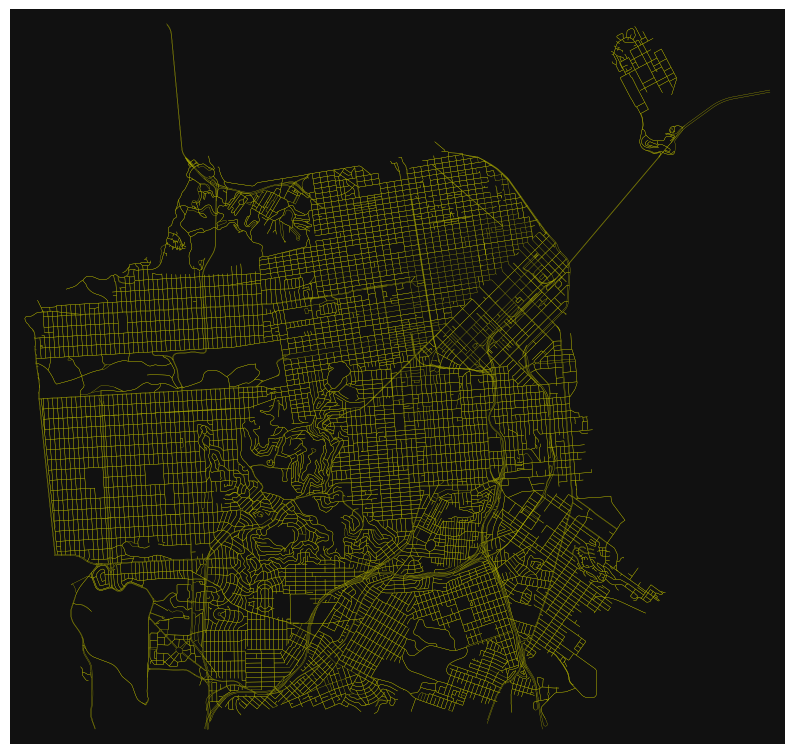

In [10]:
# you can make query an unambiguous dict to help the geocoder find it
place = {"city": "San Francisco", "state": "California", "country": "USA"}
G = ox.graph_from_place(place, network_type="drive", truncate_by_edge=True)
fig, ax = ox.plot_graph(G, figsize=(10, 10), node_size=0, edge_color="y", edge_linewidth=0.2)

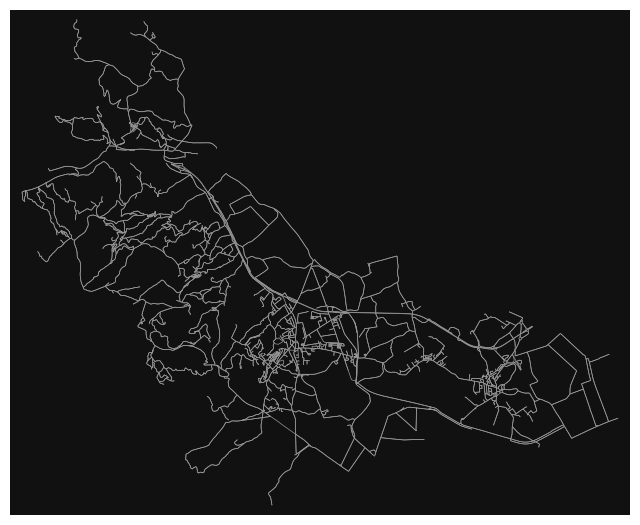

In [11]:
# get networks anywhere in the world.
G = ox.graph_from_place("Sinalunga, Italy", network_type="all")
fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.5)

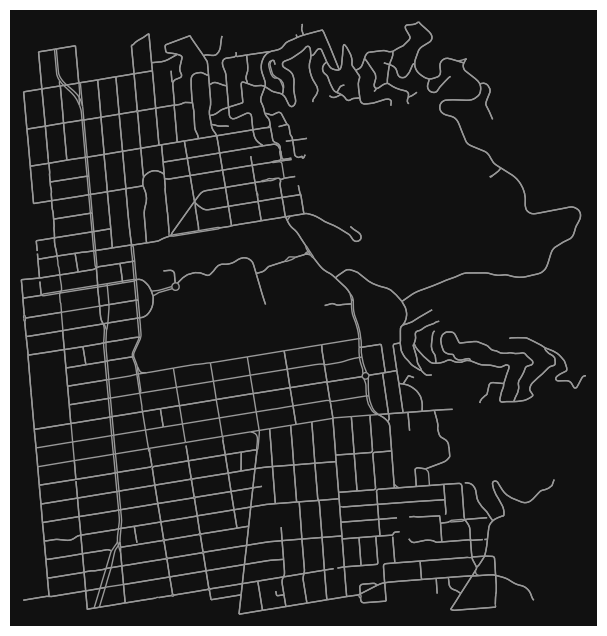

In [12]:
wurster_hall = (37.870605, -122.254830)
one_mile = 1609  # meters
G = ox.graph_from_point(wurster_hall, dist=one_mile, network_type="drive")
fig, ax = ox.plot_graph(G, node_size=0)

# Get place boundaries from OSM
The graph_from_place function uses place boundary geocoding logic to find the network within your place's boundary. Let's look briefly at this place boundary querying before we get to street networks.

We can download by cities, neighborhoods, boroughs, counties, stats, or countries: anything with geocodable polygon boundaries in OSM's database.

In [5]:
# neighborhoods or boroughs
gdf = ox.geocode_to_gdf("Manhattan, New York, New York, USA")

# counties
gdf1 = ox.geocode_to_gdf("Cook County, Illinois, United States")

# states
gdf2 = ox.geocode_to_gdf("Iowa")

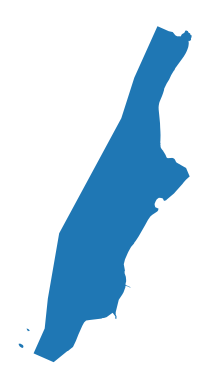

In [23]:
places = ox.project_gdf(gdf)
ax = places.plot()
_ = ax.axis('off')

In [10]:
# buffer the place boundaries (0.5 km in this example)
gdf3 = ox.geocode_to_gdf("Piedmont, California, USA", buffer_dist=500)

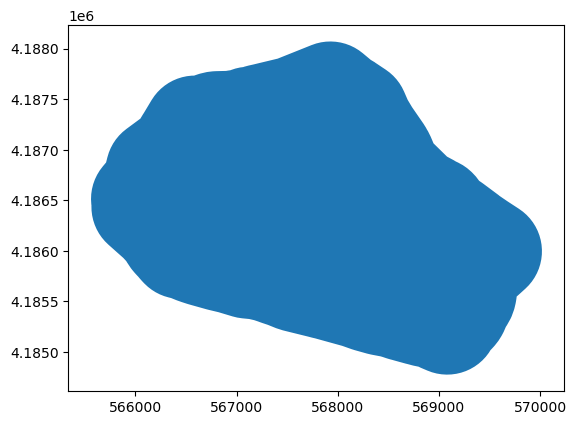

In [17]:
places = ox.project_gdf(gdf3)
ax = places.plot()
_ = ax.axis('on')

In [24]:
# We can get multiple places in a single query
gdf = ox.geocode_to_gdf(["United Kingdom", "Ireland"])

# or optionally buffer them
places = [
    "Berkeley, California, USA",
    "Oakland, California, USA",
    "Piedmont, California, USA",
    "Emeryville, California, USA",
    "Alameda, Alameda County, CA, USA",
]
gdf = ox.geocode_to_gdf(places, buffer_dist=500)

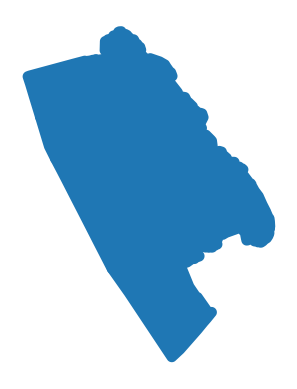

In [26]:
places = ox.project_gdf(gdf)
ax = places.plot()
_ = ax.axis('off')

## Get street networks by place name.

In [29]:
# get the walking network for piedmont
G = ox.graph_from_place("Piedmont, California, USA", network_type="walk")

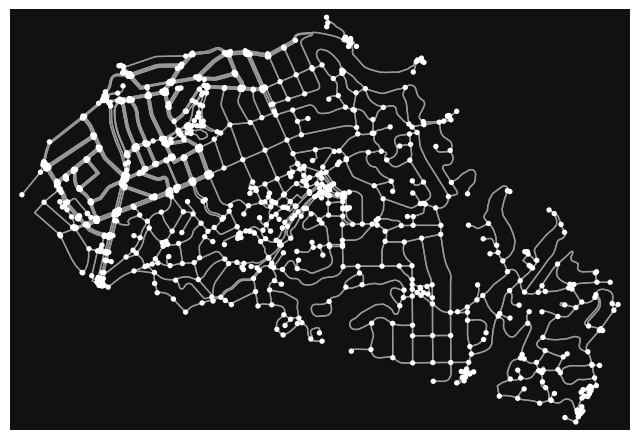

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [30]:
G_proj1 = ox.project_graph(G)
ox.plot_graph(G_proj1)

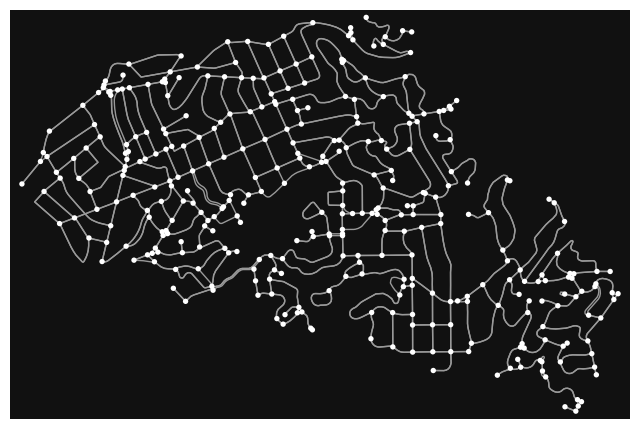

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [32]:
G1_nb = ox.graph_from_place("Piedmont, California, USA", network_type="drive")
G_proj2_nb = ox.project_graph(G1_nb)
ox.plot_graph(G_proj2_nb)

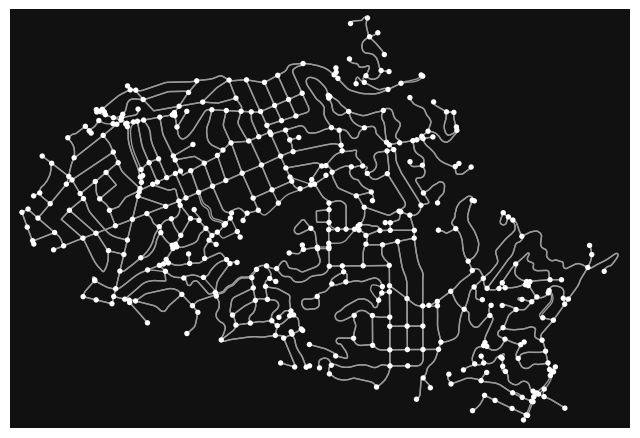

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [33]:
# get a network with a buffer distance
G1 = ox.graph_from_place("Piedmont, California, USA", network_type="drive", buffer_dist=200)
G_proj2 = ox.project_graph(G1)
ox.plot_graph(G_proj2)

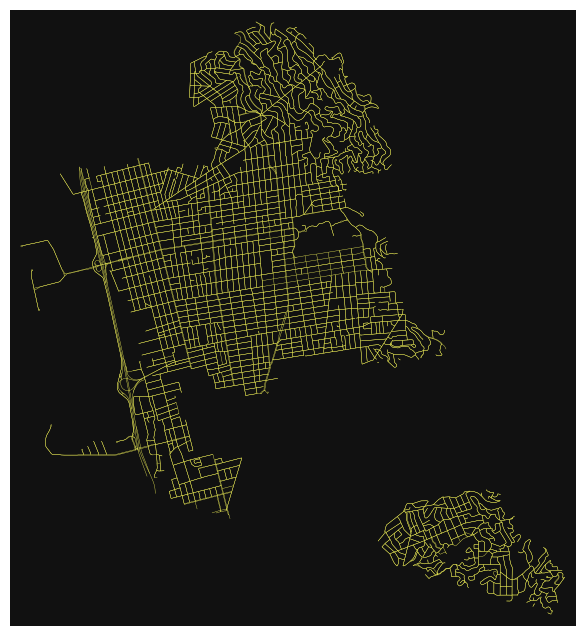

In [34]:
# create a network from multiple places
places = [
    "Piedmont, California, USA",
    {"city": "Berkeley", "state": "California"},
    "Emeryville, California, USA",
]

# use retain_all to keep all disconnected subgraphs (e.g. if your places aren't contiguous)
G = ox.graph_from_place(places, network_type="drive", retain_all=True)
fig, ax = ox.plot_graph(G, node_size=0, edge_color="#FFFF5C", edge_linewidth=0.25)

In [35]:
# or create a network from structured place queries
places = [
    {"city": "Daly City", "state": "California"},
    {"city": "South San Francisco", "state": "California"},
]
G = ox.graph_from_place(places, network_type="drive")

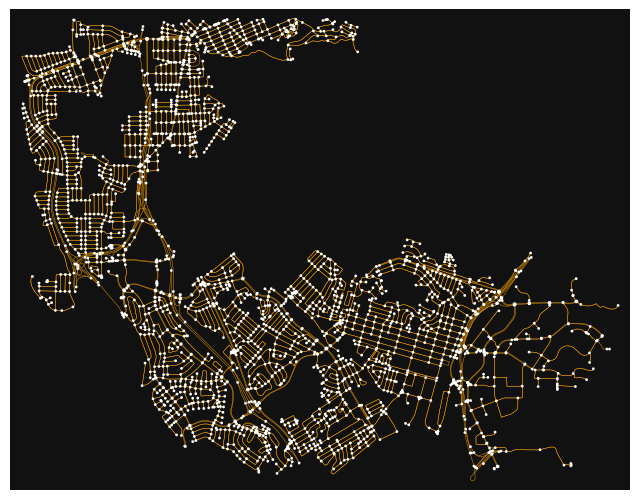

In [53]:
ax = ox.plot_graph(G, node_size=4, edge_color='orange', edge_linewidth=0.3)

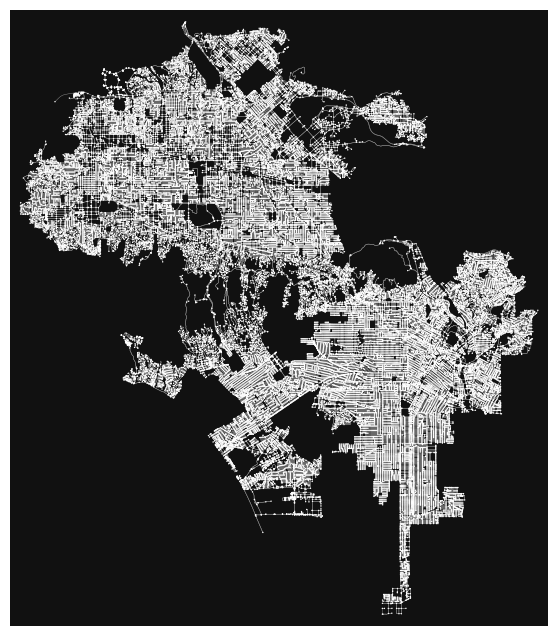

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [58]:
G = ox.graph_from_place('Los Angeles, California', network_type='drive')
ox.plot_graph(G,node_size=0.672, edge_linewidth=0.3)

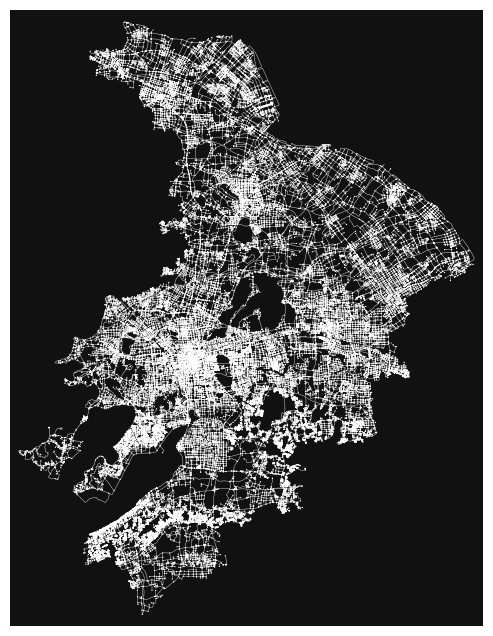

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [59]:
G = ox.graph_from_place('Su Zhou, Jiangsu', network_type='drive')
ox.plot_graph(G,node_size=0.783, edge_linewidth=0.3)